# 1-Step Forecast dan Multi-step Forecast

In [1]:
#install
!pip install -U scikit-learn

#download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Model

#buat dataframe
df = pd.read_csv('airline_passengers.csv', index_col="Month", parse_dates=True)

#buat kolom baru
df['LogPassengers'] = np.log(df['Passengers'])
df['DiffLogPassengers'] = df['LogPassengers'].diff()

#buat seed
np.random.seed(123)
tf.random.set_seed(123)

#buat variable
Ntest=12
train=df.iloc[:-Ntest] # -> sama aja kaya di atas tail(12)
test=df.iloc[-Ntest:] # -> sama aja kaya tail(12)

#buat dataseries yang berisi nilai boolean
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

#buat supervised dataset
series = df['DiffLogPassengers'].dropna().to_numpy() #buat data series baru yang hanya berisi kolom DiffLogPassengers aja

T=10 #buat variable T
X=[] #buat variable array X
Y=[] #buat variable array Y

#buat looping
for t in range(len(series) - T): #buat perulangan
  x = series[t:t+T] #x itu nilainya sama aja kaya data_series mulai dari 0 -> 10 
  X.append(x) #simpan nilai dari variable x ke variable array X
  y = series[t+T] #y itu nilainya sama aja kaya data_series mulai dari yang ke 11
  Y.append(y) #simpan nilai dari variable y ke variable array Y

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, "\nY.shape: ", Y.shape)

--2022-01-12 11:05:36--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-01-12 11:05:36 (23.9 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]

X.shape:  (133, 10, 1) 
Y.shape:  (133,)


In [2]:
train

,Passengers,LogPassengers,DiffLogPassengers
Month,,,
1949-01-01,112,4.718499,NaN
1949-02-01,118,4.770685,0.052186
1949-03-01,132,4.882802,0.112117
1949-04-01,129,4.859812,-0.022990
1949-05-01,121,4.795791,-0.064022
...,...,...,...
1959-08-01,559,6.326149,0.019874
1959-09-01,463,6.137727,-0.188422
1959-10-01,407,6.008813,-0.128914


### Cek variable di atas

In [3]:
print("Data series:\n",series,"\n\nX[0]:\n",X[0],"\n\nY[0]:\n",Y[0])

Data series:
 [ 0.05218575  0.1121173  -0.02298952 -0.06402186  0.10948423  0.0919375
  0.         -0.08455739 -0.13353139 -0.13473259  0.12629373 -0.0257525
  0.09134978  0.11247798 -0.04348511 -0.07696104  0.17563257  0.13185213
  0.         -0.0732034  -0.1722459  -0.15415068  0.20544397  0.03509132
  0.03390155  0.17114826 -0.08803335  0.05374428  0.03428907  0.11152127
  0.         -0.07836907 -0.12733942 -0.10398971  0.12838117  0.02967577
  0.05129329  0.06973334 -0.06419316  0.01098912  0.17500891  0.05358425
  0.05085842 -0.14660347 -0.09006082 -0.10477895  0.12036368  0.0102565
  0.          0.18571715 -0.00424629 -0.02586351  0.05933944  0.08288766
  0.02985296 -0.13774193 -0.11620201 -0.15890128  0.11034806  0.01481509
 -0.08167803  0.22314355 -0.0346355   0.0303711   0.12062799  0.13447791
 -0.03025441 -0.12334455 -0.12310606 -0.12051602  0.12051602  0.05521572
 -0.03789927  0.1362102   0.00746272  0.00371058  0.15415068  0.14458123
 -0.04782909 -0.10632159 -0.12987508 -0.

In [4]:
print("tampilan dataframe:\n")
print(df)

tampilan dataframe:

            Passengers  LogPassengers  DiffLogPassengers
Month                                                   
1949-01-01         112       4.718499                NaN
1949-02-01         118       4.770685           0.052186
1949-03-01         132       4.882802           0.112117
1949-04-01         129       4.859812          -0.022990
1949-05-01         121       4.795791          -0.064022
...                ...            ...                ...
1960-08-01         606       6.406880          -0.026060
1960-09-01         508       6.230481          -0.176399
1960-10-01         461       6.133398          -0.097083
1960-11-01         390       5.966147          -0.167251
1960-12-01         432       6.068426           0.102279

[144 rows x 3 columns]


In [5]:
print("tampilan data series:\n")
print(series)

tampilan data series:

[ 0.05218575  0.1121173  -0.02298952 -0.06402186  0.10948423  0.0919375
  0.         -0.08455739 -0.13353139 -0.13473259  0.12629373 -0.0257525
  0.09134978  0.11247798 -0.04348511 -0.07696104  0.17563257  0.13185213
  0.         -0.0732034  -0.1722459  -0.15415068  0.20544397  0.03509132
  0.03390155  0.17114826 -0.08803335  0.05374428  0.03428907  0.11152127
  0.         -0.07836907 -0.12733942 -0.10398971  0.12838117  0.02967577
  0.05129329  0.06973334 -0.06419316  0.01098912  0.17500891  0.05358425
  0.05085842 -0.14660347 -0.09006082 -0.10477895  0.12036368  0.0102565
  0.          0.18571715 -0.00424629 -0.02586351  0.05933944  0.08288766
  0.02985296 -0.13774193 -0.11620201 -0.15890128  0.11034806  0.01481509
 -0.08167803  0.22314355 -0.0346355   0.0303711   0.12062799  0.13447791
 -0.03025441 -0.12334455 -0.12310606 -0.12051602  0.12051602  0.05521572
 -0.03789927  0.1362102   0.00746272  0.00371058  0.15415068  0.14458123
 -0.04782909 -0.10632159 -0.129

In [6]:
print("tampilan train_idx:\n")
print(train_idx)

tampilan train_idx:

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False]


In [7]:
print("tampilan test_idx:\n")
print(test_idx)

tampilan test_idx:

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True]


In [8]:
print("tampilan variable array X sebelum berubah:\n")
print(X)

tampilan variable array X sebelum berubah:

[[[ 0.05218575]
  [ 0.1121173 ]
  [-0.02298952]
  ...
  [-0.08455739]
  [-0.13353139]
  [-0.13473259]]

 [[ 0.1121173 ]
  [-0.02298952]
  [-0.06402186]
  ...
  [-0.13353139]
  [-0.13473259]
  [ 0.12629373]]

 [[-0.02298952]
  [-0.06402186]
  [ 0.10948423]
  ...
  [-0.13473259]
  [ 0.12629373]
  [-0.0257525 ]]

 ...

 [[ 0.11224286]
  [ 0.02919915]
  [-0.06437866]
  ...
  [ 0.15067335]
  [-0.02606011]
  [-0.17639854]]

 [[ 0.02919915]
  [-0.06437866]
  [ 0.06916336]
  ...
  [-0.02606011]
  [-0.17639854]
  [-0.0970834 ]]

 [[-0.06437866]
  [ 0.06916336]
  [ 0.09552712]
  ...
  [-0.17639854]
  [-0.0970834 ]
  [-0.1672513 ]]]


In [9]:
print("tampilan variable array Y:\n")
print(Y)

tampilan variable array Y:

[ 0.12629373 -0.0257525   0.09134978  0.11247798 -0.04348511 -0.07696104
  0.17563257  0.13185213  0.         -0.0732034  -0.1722459  -0.15415068
  0.20544397  0.03509132  0.03390155  0.17114826 -0.08803335  0.05374428
  0.03428907  0.11152127  0.         -0.07836907 -0.12733942 -0.10398971
  0.12838117  0.02967577  0.05129329  0.06973334 -0.06419316  0.01098912
  0.17500891  0.05358425  0.05085842 -0.14660347 -0.09006082 -0.10477895
  0.12036368  0.0102565   0.          0.18571715 -0.00424629 -0.02586351
  0.05933944  0.08288766  0.02985296 -0.13774193 -0.11620201 -0.15890128
  0.11034806  0.01481509 -0.08167803  0.22314355 -0.0346355   0.0303711
  0.12062799  0.13447791 -0.03025441 -0.12334455 -0.12310606 -0.12051602
  0.12051602  0.05521572 -0.03789927  0.1362102   0.00746272  0.00371058
  0.15415068  0.14458123 -0.04782909 -0.10632159 -0.12987508 -0.14506797
  0.15956097  0.02135312 -0.02495673  0.13488427 -0.01269858  0.01584819
  0.16220441  0.0991918 

In [10]:
print("tampilan variable array X setelah direshape:\n")
print(X)

tampilan variable array X setelah direshape:

[[[ 0.05218575]
  [ 0.1121173 ]
  [-0.02298952]
  ...
  [-0.08455739]
  [-0.13353139]
  [-0.13473259]]

 [[ 0.1121173 ]
  [-0.02298952]
  [-0.06402186]
  ...
  [-0.13353139]
  [-0.13473259]
  [ 0.12629373]]

 [[-0.02298952]
  [-0.06402186]
  [ 0.10948423]
  ...
  [-0.13473259]
  [ 0.12629373]
  [-0.0257525 ]]

 ...

 [[ 0.11224286]
  [ 0.02919915]
  [-0.06437866]
  ...
  [ 0.15067335]
  [-0.02606011]
  [-0.17639854]]

 [[ 0.02919915]
  [-0.06437866]
  [ 0.06916336]
  ...
  [-0.02606011]
  [-0.17639854]
  [-0.0970834 ]]

 [[-0.06437866]
  [ 0.06916336]
  [ 0.09552712]
  ...
  [-0.17639854]
  [-0.0970834 ]
  [-0.1672513 ]]]


In [11]:
print("Jumlah panjang dataframe:",len(df),"\nJumlah panjang X: ",len(X), "\nJumlah panjang Y: ",len(Y))

Jumlah panjang dataframe: 144 
Jumlah panjang X:  133 
Jumlah panjang Y:  133


# Lanjut ke CNN

In [12]:
#buat variable untuk data training dan testing
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest] # => untuk data training
Xtest, Ytest = X[-Ntest:], Y[-Ntest:] # => untuk data testing

#buat model CNN
i = Input(shape=(T,1))
x = Conv1D(16, 3, activation='relu')(i)
x = MaxPooling1D(2)(x)
x = Conv1D(32, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1)(x)
model = Model(i,x)

#buat summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 8, 16)             64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 16)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             1568      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 33    

In [13]:
#buat compiler
model.compile(loss='mse',optimizer='adam')

#buat fit model
r = model.fit(Xtrain,Ytrain,epochs=100,validation_data = (Xtest,Ytest))

Epoch 1/100
4/4 [==============================] - 1s 66ms/step - loss: 0.0110 - val_loss: 0.0112
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0102 - val_loss: 0.0109
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0097 - val_loss: 0.0105
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0093 - val_loss: 0.0100
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0089 - val_loss: 0.0097
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0086 - val_loss: 0.0094
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0081 - val_loss: 0.0091
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0077 - val_loss: 0.0089
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0074 - val_loss: 0.0086
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0071 - val_loss: 0.0083
Epoch 11/100
4/4 [===

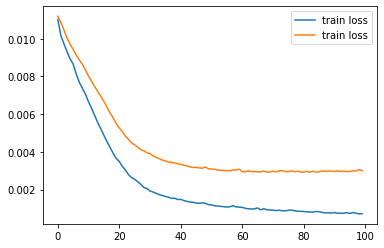

In [14]:
#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='train loss')
plt.legend()

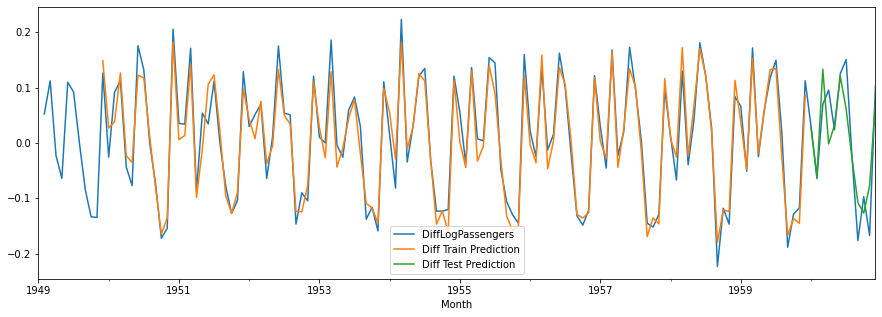

In [15]:
#buat agar nilai dari T+1 tidak dapat diprediksi
train_idx[:T+1] = False

#buat variable baru
Ptrain = model.predict(Xtrain).flatten()
Ptest = model.predict(Xtest).flatten()

#buat kolom baru
df.loc[train_idx,'Diff Train Prediction'] = Ptrain
df.loc[test_idx,'Diff Test Prediction'] = Ptest

#buat variable array
cols = ['DiffLogPassengers','Diff Train Prediction', 'Diff Test Prediction']

#buat plot
df[cols].plot(figsize=(15,5))

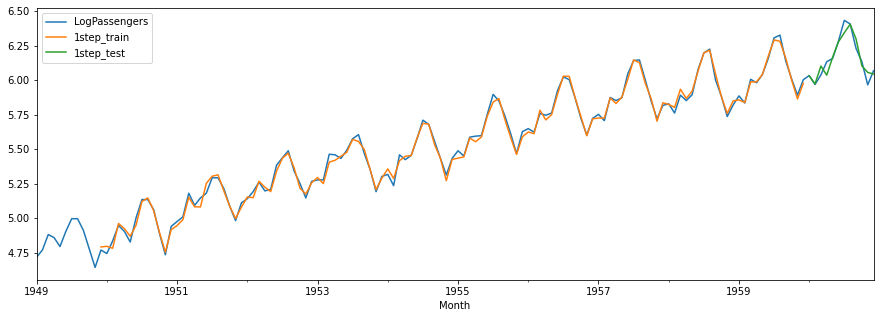

In [16]:
#buat variable baru untuk mengetahui prediksi yang tidak berbeda
df['ShiftLogPassengers'] = df['LogPassengers'].shift(1)
prev=df['ShiftLogPassengers']

#untuk mengetahui nilai data training terakhir
last_train=train.iloc[-1]['LogPassengers']

#1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

#plot 1-step forecast
df[['LogPassengers','1step_train','1step_test']].plot(figsize=(15,5))

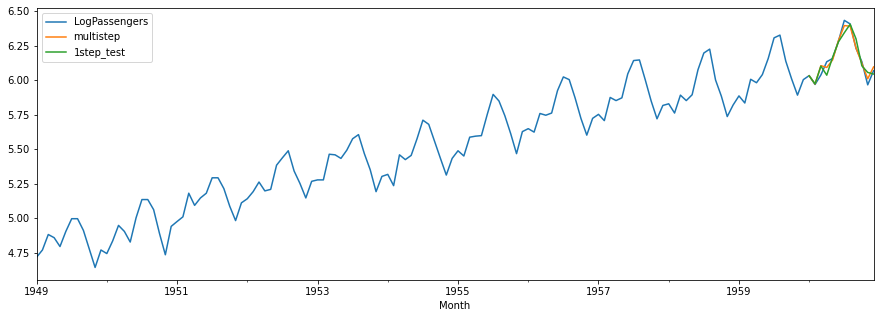

In [17]:
#multi-step forecast

#buat variable array
multistep_predictions = []

#buat variable
last_x = Xtest[0]

#buat looping
while len(multistep_predictions) < Ntest:
  #buat variable
  p = model.predict(last_x.reshape(1,-1))[0]

  #update list prediksi
  multistep_predictions.append(p)

  #buat inputan baru
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

#simpan multi-step forecast ke dalam dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

#buat plot 1-step dan multi-step forecast
df[['LogPassengers','multistep','1step_test']].plot(figsize=(15,5))

In [18]:
p

array([0.08610717], dtype=float32)

# Multi-output Forecast

In [19]:
#buat multi-output supervised dataset

#buat variable
Tx = T
Ty = Ntest

#buat variable array
X = []
Y = []

#looping
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

#reshape array X dan Y
X = np.array(X).reshape(-1, Tx, 1)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)

#display shape dari array X dan Y
print("X.shape: ",X.shape,"\nY.shape: ",Y.shape)

X.shape:  (122, 10, 1) 
Y.shape:  (122, 12)


In [20]:
#buat model untuk data training dan testing
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

#buat model CNN
i = Input(shape=(Tx, 1))
x = Conv1D(16,3,activation='relu')(i)
x = MaxPooling1D(2)(x)
x = Conv1D(32, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(Ty)(x)
model = Model(i, x)

#buat compiler
model.compile(loss='mse',optimizer='adam')

#buat fit model
r = model.fit(Xtrain_m, Ytrain_m, epochs=200, validation_data=(Xtest_m,Ytest_m))

Epoch 1/200
4/4 [==============================] - 1s 46ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0110 - val_loss: 0.0116
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0107 - val_loss: 0.0113
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0105 - val_loss: 0.0108
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 9/200
4/4 [==============================] - 0s 9ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 10/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 11/200
4/4 [=====

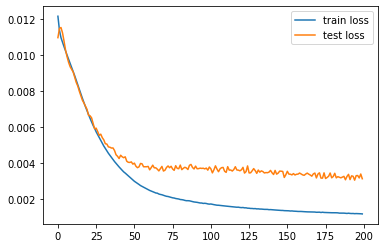

In [21]:
#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()

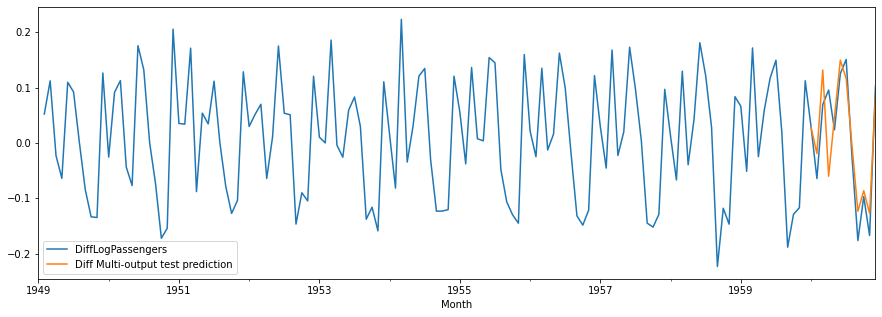

In [22]:
#buat data training dan testing
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

df.loc[test_idx, 'Diff Multi-output test prediction'] = Ptest
cols=['DiffLogPassengers','Diff Multi-output test prediction']
df[cols].plot(figsize=(15,5))

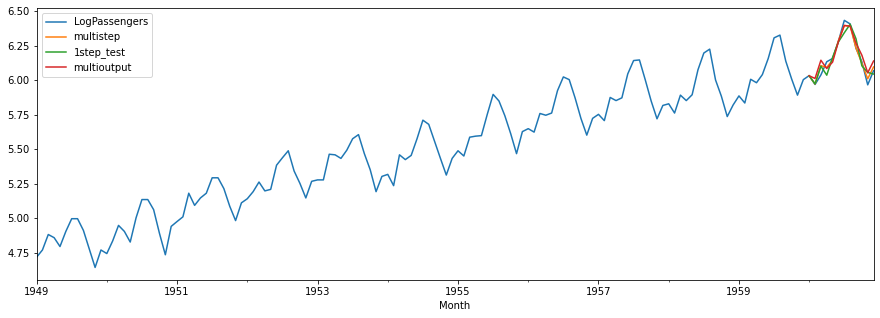

In [23]:
#simpan multi-output ke dalam dataframe
df.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)

#buat plot untuk semua forecast
cols = ['LogPassengers','multistep','1step_test','multioutput']
df[cols].plot(figsize=(15,5))

In [24]:
#MAPE
test_log_pass = df.iloc[-Ntest:]['LogPassengers']
mape1=mean_absolute_percentage_error(test_log_pass,df.loc[test_idx,'multistep'])
print("multi-step MAPE:",mape1)
mape2=mean_absolute_percentage_error(test_log_pass,df.loc[test_idx,'multioutput'])
print("multi-step MAPE:",mape2)

multi-step MAPE: 0.003642729631224577
multi-step MAPE: 0.007155414694696227
